In [2]:
#表面に対してのランドマーク
import os
import sys
import glob
import dlib
from skimage import io

options = dlib.shape_predictor_training_options()
options.oversampling_amount = 300
options.nu = 0.05
options.tree_depth = 2
options.be_verbose = True

#best#train:test=8:2#
training_xml_path = "train/train.xml"
dlib.train_shape_predictor(training_xml_path, "predictor.dat", options)
print("\nTraining accuracy: {}".format(
    dlib.test_shape_predictor(training_xml_path, "predictor.dat")))

testing_xml_path = "test/test.xml"
print("Testing accuracy: {}".format(
    dlib.test_shape_predictor(testing_xml_path, "predictor.dat")))


answer_xml_path = "image_front/ans.xml"
dlib.train_shape_predictor(answer_xml_path, "answer.dat", options)
print("Answer accuracy: {}".format(
    dlib.test_shape_predictor(answer_xml_path, "answer.dat")))

detector1 = dlib.simple_object_detector("image_front/front_detector.svm")
#detector2 = dlib.simple_object_detector("image_back/back_detector.svm")
#detector3 = dlib.simple_object_detector("image_naname/naname_detector.svm")
predictor = dlib.shape_predictor("predictor.dat")
answer = dlib.shape_predictor("answer.dat")



Training accuracy: 0.6861970356364411
Testing accuracy: 4.840829613183728
Answer accuracy: 0.4136452539256817


【パス】　image_front/reF_20190806_033012378_iOS.jpg
【検出ラベル】
Part(0)=(30, 164), Part(1)=(390, 176), Part(2)=(20, 402) ...
【正解ラベル】
Part(0)=(27, 167), Part(1)=(390, 174), Part(2)=(18, 406) ...
【検出ラベルと正解ラベルの各座標間の距離】
[4.24, 2.0, 4.47, 4.47, 1.41, 2.83, 2.24, 1.41]
【平均】 2.88
AWAY
【TOTAL】
away:1
near:0
----------------------------------------------------------
【パス】　image_front/reF_20190806_032723324_iOS.jpg
【検出ラベル】
Part(0)=(75, 242), Part(1)=(320, 245), Part(2)=(73, 405) ...
【正解ラベル】
Part(0)=(75, 244), Part(1)=(321, 245), Part(2)=(73, 407) ...
【検出ラベルと正解ラベルの各座標間の距離】
[2.0, 1.0, 2.0, 2.83, 0.0, 1.41, 1.0, 1.0]
【平均】 1.4
NEAR
【TOTAL】
away:1
near:1
----------------------------------------------------------
【パス】　image_front/reF_20190806_032641937_iOS.jpg
【検出ラベル】
Part(0)=(97, 244), Part(1)=(316, 240), Part(2)=(95, 386) ...
【正解ラベル】
Part(0)=(95, 244), Part(1)=(319, 240), Part(2)=(97, 388) ...
【検出ラベルと正解ラベルの各座標間の距離】
[2.0, 3.0, 2.83, 1.0, 0.0, 1.0, 1.0, 1.0]
【平均】 1.48
NEAR
【TOTAL】
away:1
near:2
---------------

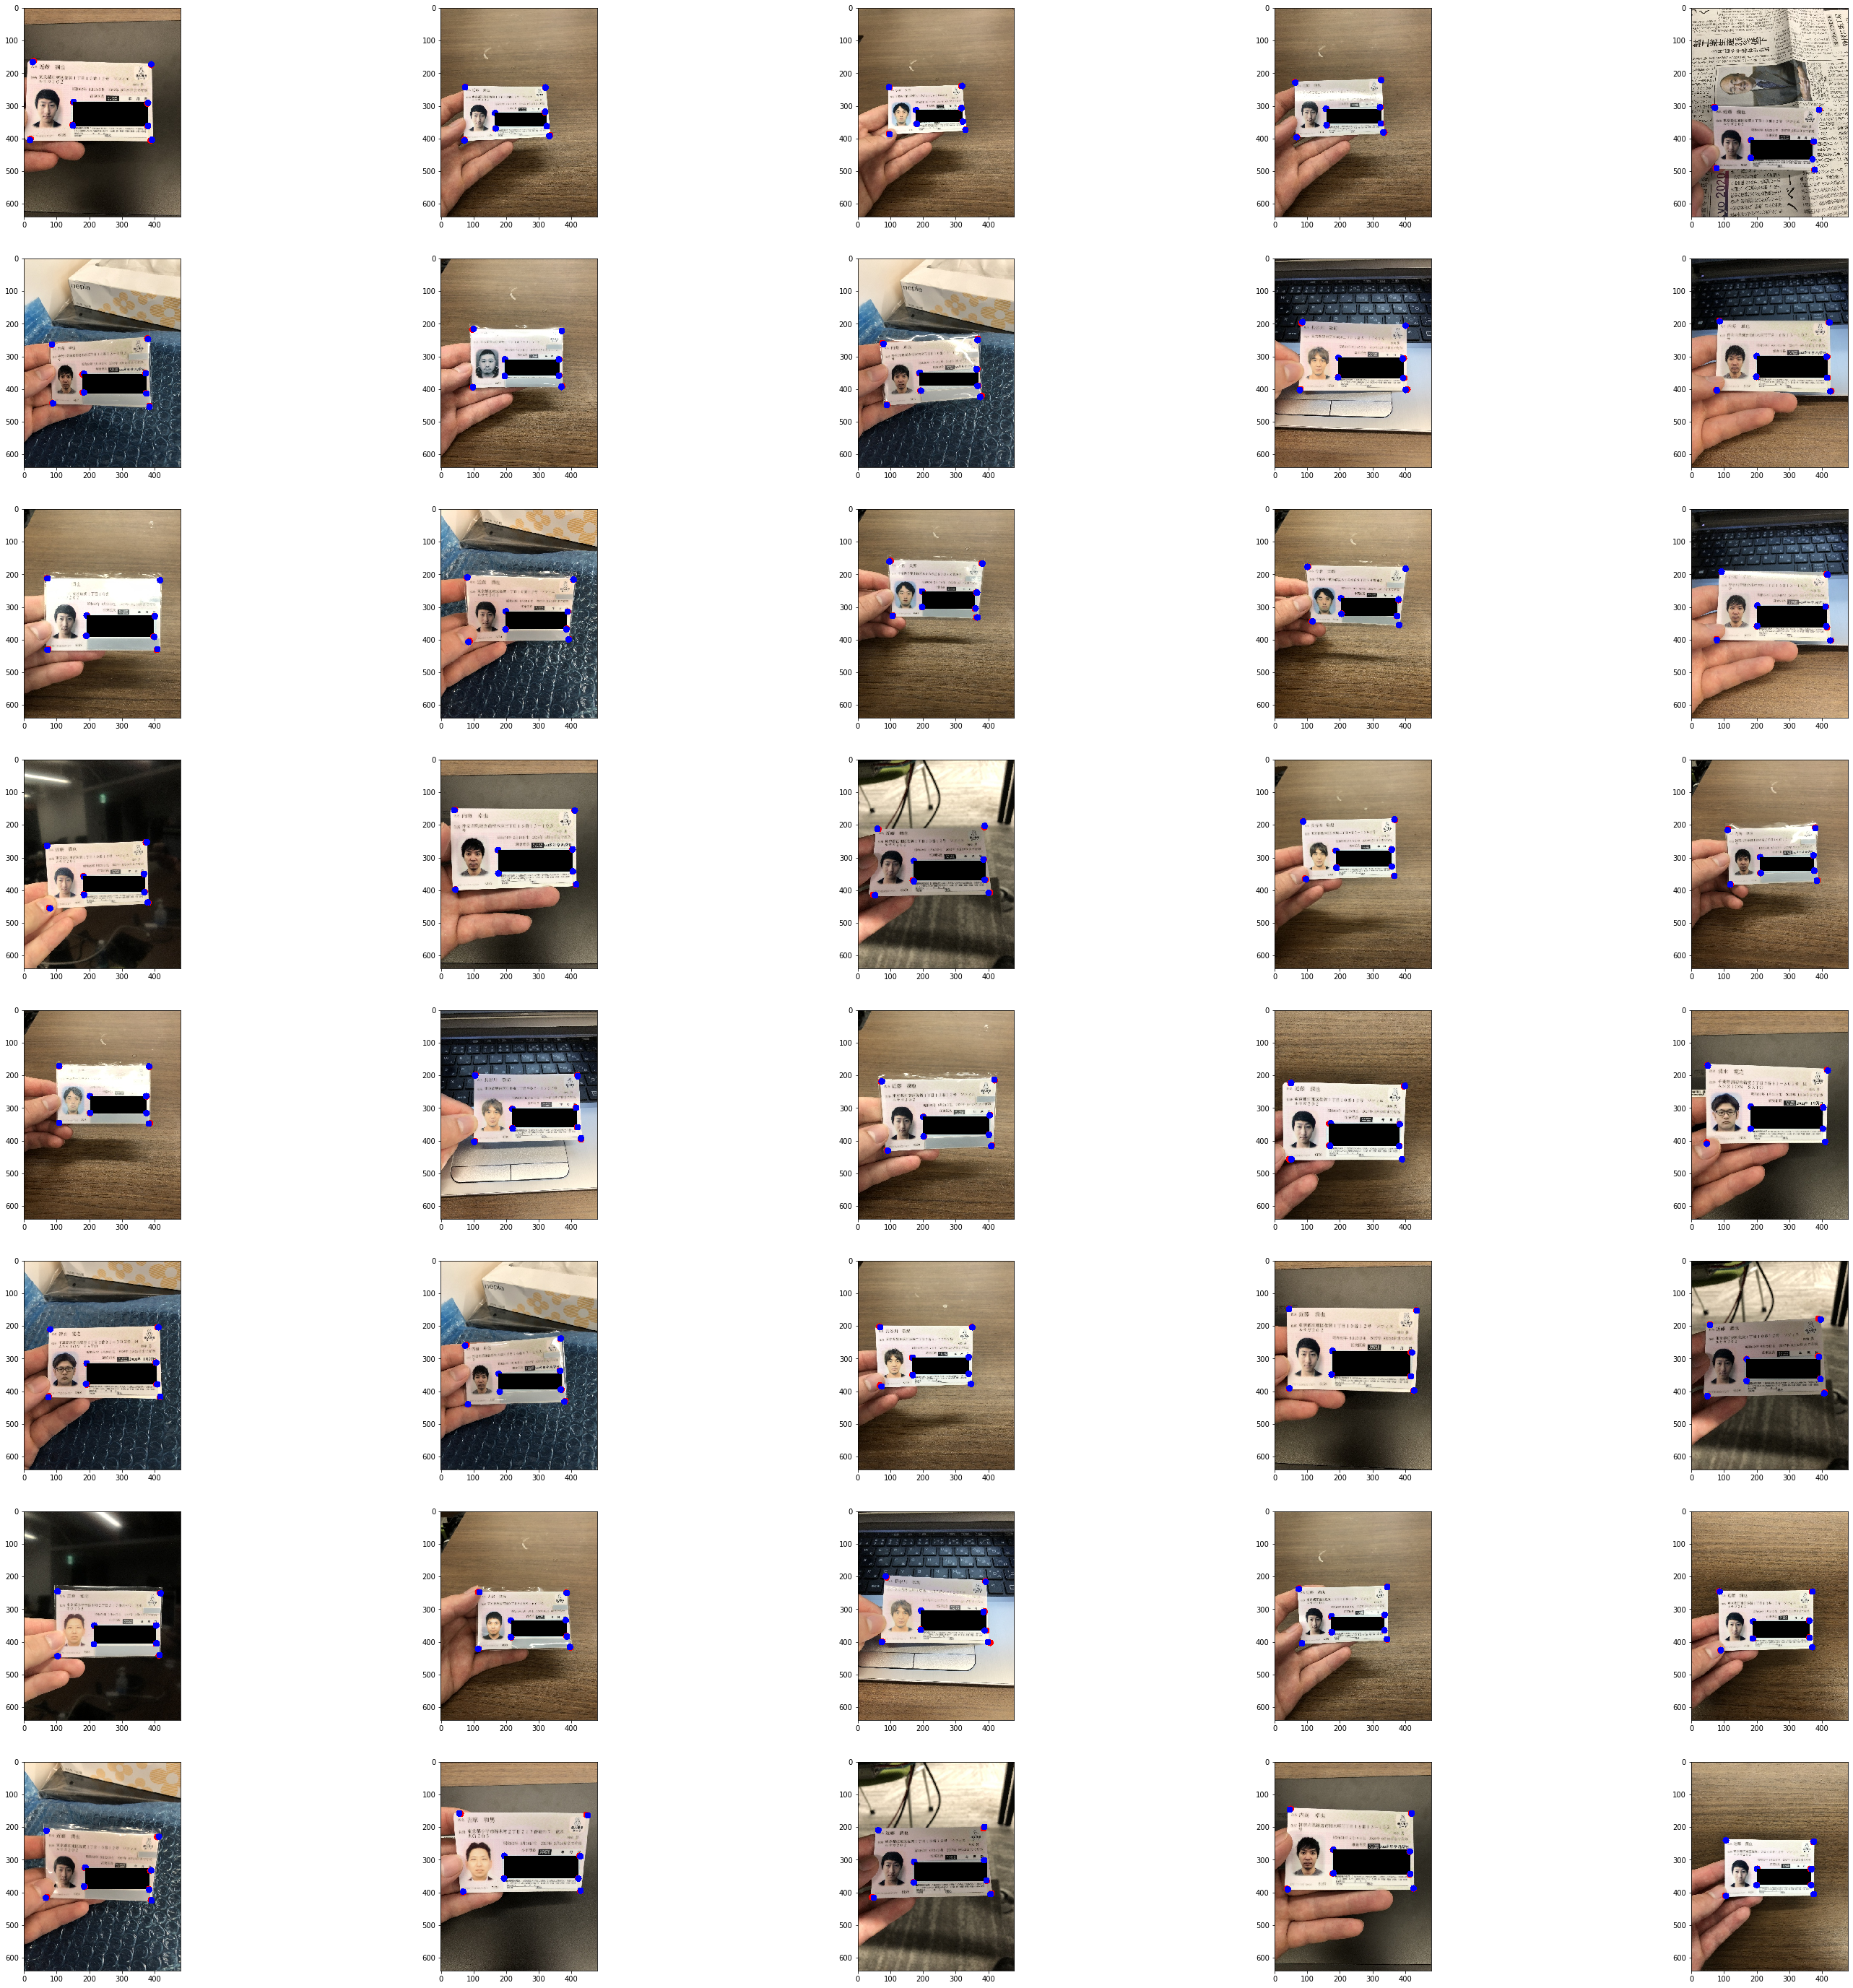

In [144]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import cv2
import math

predictor = dlib.shape_predictor("predictor.dat")
answer = dlib.shape_predictor("answer.dat")

cnt = 1
count_away, count_near = 0, 0

def subplot():
    global cnt
    plt.subplot(8,5,cnt)
    cnt += 1
    
def draw():
        cv2.circle(img,(int(shape_point.x), int(shape_point.y)),10,(0,0,255),thickness = -1)#red
        cv2.circle(img,(int(shape_point_ans.x), int(shape_point_ans.y)),10,(255,0,0),thickness = -1)#blue
            
        #ラベル名[04-07]のMask処理
        if shape_point_count == 4 :
            shape_migishita = shape.part(7)
            cv2.rectangle(img,(int(shape_point.x),int(shape_point.y)),(int(shape_migishita.x),int(shape_migishita.y)),(0,0,0),-1)
    
def com():
    if ave > sum_ave:            
        print("AWAY")
        count_away+=1
            
    else:
        print("NEAR")
        count_near+=1

    
            
    
plt.figure(figsize=(50,50))
files = glob.glob('image_front/*.jpg')

ave_list = []
for path in files:
    print("【パス】　{}".format(path))
    img = cv2.imread(path)
    dets1 = detector1(img, 1)

    if len(dets1) == 0:
        continue
    
    
    for k,d in enumerate(dets1):
        shape = predictor(img, d)
        shape_ans = answer(img, d)
        
        print("【検出ラベル】")
        print("Part(0)={}, Part(1)={}, Part(2)={} ...".format(
            shape.part(0),shape.part(1),shape.part(2)))
       
        print("【正解ラベル】")
        print("Part(0)={}, Part(1)={}, Part(2)={} ...".format(
            shape_ans.part(0),shape_ans.part(1),shape_ans.part(2)))
        
        list = []
        
        for shape_point_count in range(shape.num_parts):
            shape_point = shape.part(shape_point_count)
            shape_point_ans = shape_ans.part(shape_point_count)
         
            sub_x = int(shape_point.x) - int(shape_point_ans.x)
            sub_y = int(shape_point.y) - int(shape_point_ans.y)
            dis = round(math.sqrt(sub_x**2 + sub_y**2),2)
            list.append(dis)

            #print("Part {}:({},{})={}".format(shape_point_count,sub_x, sub_y,sub))
            
            draw()
            
        print("【検出ラベルと正解ラベルの各座標間の距離】")
        print(list)
        
        ave = round(np.mean(list),2)            
        print("【平均】 {}".format(ave))       
        ave_list.append(ave)
        
        #判定
        if ave > sum_ave:            
            print("AWAY")
            count_away+=1           
        else:
            print("NEAR")
            count_near+=1
            
        print("【TOTAL】")    
        print("away:{}".format(count_away))
        print("near:{}".format(count_near))
        print('----------------------------------------------------------')

   
    subplot()
    plt.imshow(img[:,:,::-1])
    
    
    if cnt > 40:
        break
        
print('----------------------------------------------------------')        
print("【各画像の【平均】のリスト】")
print(ave_list)

sum_ave = round(math.fsum(ave_list)/(cnt-1),2)
print("【総平均】：{}".format(sum_ave))
print("【合計】")
print("away:{}/{}".format(count_away,(cnt-1)))
print("near:{}/{}".format(count_near,(cnt-1)))
